In [1]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])

LinearRegression()

In [2]:
reg.coef_

array([0.5, 0.5])

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

diabetes_X = diabetes_X[:, np.newaxis, 2]

diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

regr = linear_model.LinearRegression()

regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [4]:
regr.coef_

array([938.23786125])

In [5]:
diabetes_y_pred = regr.predict(diabetes_X_test)

mean_squared_error(diabetes_y_test, diabetes_y_pred)

2548.0723987259694

In [6]:
r2_score(diabetes_y_test, diabetes_y_pred)

0.47257544798227147

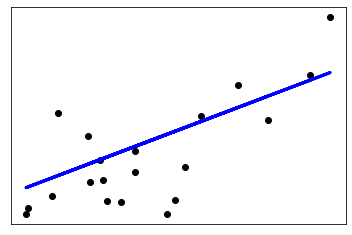

In [7]:
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")

plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [8]:
np.random.seed(42)

n_samples, n_features = 200, 50

X = np.random.randn(n_samples, n_features)

true_coef = 3 * np.random.randn(n_features)

true_coef[true_coef < 0] = 0

y = np.dot(X, true_coef)

y += 5 * np.random.normal(size = (n_samples,))

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

reg_nnls = LinearRegression(positive=True)

y_pred_nnls = reg_nnls.fit(X_train, y_train).predict(X_test)

r2_score(y_test, y_pred_nnls)

0.8215360484059376

In [15]:
reg_ols = LinearRegression()

y_pred_ols = reg_ols.fit(X_train, y_train).predict(X_test)

r2_score(y_test, y_pred_ols)

0.8241566503666128

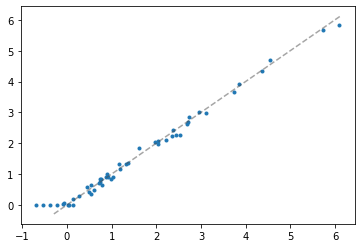

In [16]:
fig, ax = plt.subplots()

ax.plot(reg_ols.coef_, reg_nnls.coef_, linewidth=0, marker='.')

low_x, high_x = ax.get_xlim()

low_y, high_y = ax.get_ylim()

low = max(low_x, low_y)
high = min(high_x, high_y)

ax.plot([low, high], [low, high], ls='--', c=".3", alpha=0.5)

In [17]:
reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))

reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])

RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]))

In [18]:
reg.alpha_

0.01

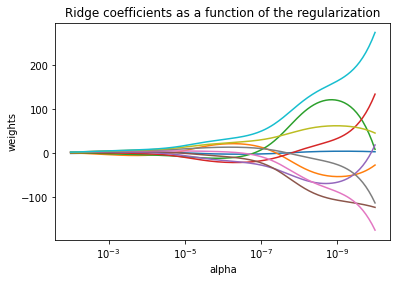

In [19]:
X = 1.0 / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

n_alphas = 200

alphas = np.logspace(-10, -2, n_alphas)

coefs = []


for a in alphas:
    ridge  = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)

ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])

plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

plt.show()

In [ ]:
# https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#sphx-glr-auto-examples-text-plot-document-classification-20newsgroups-py

import logging